In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,SGDRegressor
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

In [3]:
data = pd.read_csv('main_data.csv')
data

,date,precipitation,ndvi,month,temperature(k),temp
0,1981-07-01,0.025,0.537,1981-07,289.979,16.83
1,1981-07-16,0.020,0.480,1981-07,289.381,16.23
2,1981-08-01,0.011,0.489,1981-08,290.117,16.97
3,1981-08-16,0.009,0.615,1981-08,291.368,18.22
4,1981-09-01,0.002,0.626,1981-09,289.597,16.45
...,...,...,...,...,...,...
775,2013-10-16,0.001,0.615,2013-10,285.306,12.16
776,2013-11-01,0.001,0.620,2013-11,280.286,7.14
777,2013-11-16,0.000,0.603,2013-11,276.924,3.77
778,2013-12-01,0.000,0.596,2013-12,277.713,4.56


In [4]:
# equation  
# n = a1*t^0 + a2*t^1 + a3*t^2 + b1*p^0 + bp*t^1 + b3*p^2 

# n = ndvi, t = temp, p = precipitation
# where a1,a2,a3,b1,b2,b3  are coefficients


In [14]:
y = data[['ndvi']]
y = y.to_numpy()
x = data[['temp']]
x = x.to_numpy()
z = data[['precipitation']]
z = z.to_numpy()
y

array([[0.537],
       [0.48 ],
       [0.489],
       [0.615],
       [0.626],
       [0.615],
       [0.652],
       [0.617],
       [0.543],
       [0.608],
       [0.555],
       [0.542],
       [0.505],
       [0.495],
       [0.492],
       [0.487],
       [0.445],
       [0.476],
       [0.447],
       [0.435],
       [0.444],
       [0.478],
       [0.468],
       [0.512],
       [0.537],
       [0.463],
       [0.513],
       [0.495],
       [0.6  ],
       [0.629],
       [0.626],
       [0.613],
       [0.486],
       [0.516],
       [0.488],
       [0.463],
       [0.338],
       [0.427],
       [0.425],
       [0.455],
       [0.487],
       [0.443],
       [0.374],
       [0.428],
       [0.471],
       [0.512],
       [0.563],
       [0.547],
       [0.624],
       [0.569],
       [0.535],
       [0.503],
       [0.558],
       [0.584],
       [0.713],
       [0.648],
       [0.596],
       [0.508],
       [0.52 ],
       [0.516],
       [0.451],
       [0.455],
       [

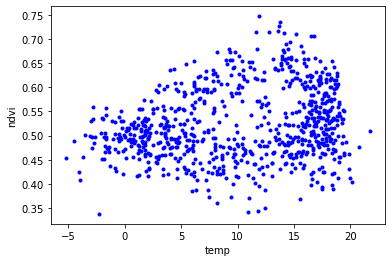

In [105]:
plt.plot(x,y,'b.')
plt.xlabel('temp')
plt.ylabel('ndvi')
plt.show()

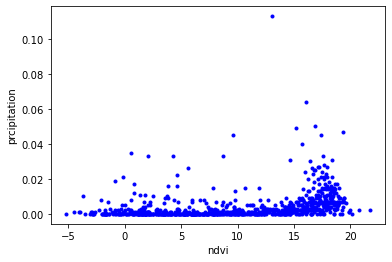

In [6]:
plt.plot(x,z,'b.')
plt.xlabel('ndvi')
plt.ylabel('prcipitation')
plt.show()

In [7]:
# Train test split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [8]:
# Applying linear regression
lr = LinearRegression()

In [9]:
lr.fit(X_train,y_train)

LinearRegression()

In [10]:
from sklearn.metrics import r2_score
y_pred = lr.predict(X_test)


In [11]:
accuracy = r2_score(y_test,y_pred)
print("%.2f" % (accuracy*100)+"% accuracy")

4.05% accuracy


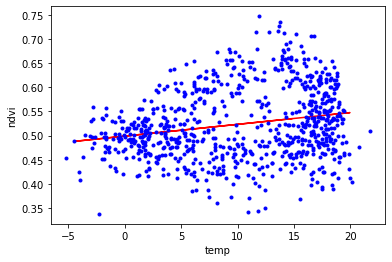

In [12]:
plt.plot(X_train,lr.predict(X_train),color='r')
plt.plot(x,y,"b.")
plt.xlabel('temp')
plt.ylabel('ndvi')
plt.show()

In [13]:
# X = 6 * np.random.rand(200,1)-3
# Y = 0.8 * X**2 + 0.9*X + 2
type(X_train)

numpy.ndarray

In [139]:
# Applying polynomial linear regression
# degree = 2
poly = PolynomialFeatures(degree=2)
X_train_trans = poly.fit_transform(X_train)
X_test_trans = poly.fit_transform(X_test)


In [140]:
print(X_train[0])
X_train_trans[0]

[10.93]


array([  1.    ,  10.93  , 119.4649])

In [141]:
lr = LinearRegression()
lr.fit(X_train_trans,y_train)

LinearRegression()

In [142]:
y_pred = lr.predict(X_test_trans)

In [143]:
r2_score(y_test,y_pred)

0.03430426927284769